In [1]:
# import os
# import html
# import re
# import pandas as pd

# # Function to remove HTML tags from text
# def remove_html_tags(text):
#     clean = re.compile('<.*?>')
#     return re.sub(clean, '', text)

# # Set the path to the folder containing HTML files
# folder_path = r"C:\Users\ameyd\Desktop\IIITD\SEM 5\ML\Project\dataset\jokes"

# # Create an empty list to store jokes
# jokes_data = []

# # Iterate through all HTML files in the folder
# for root, dirs, files in os.walk(folder_path):
#     for file_name in files:
#         if file_name.endswith(".html"):
#             file_path = os.path.join(root, file_name)

#             # Read HTML content line by line
#             with open(file_path, "r", encoding="utf-8") as file:
#                 inside_joke = False
#                 joke_lines = []

#                 for line in file:
#                     if "<!--begin of joke -->" in line:
#                         inside_joke = True
#                     elif "<!--end of joke -->" in line:
#                         inside_joke = False
#                         # Concatenate the lines to form the complete joke text
#                         joke_text = " ".join(joke_lines).strip()
#                         # Remove HTML tags
#                         joke_text = remove_html_tags(joke_text)
#                         # Append data to the list
#                         jokes_data.append({"Joke Number": len(jokes_data) + 1, "Text": joke_text})
#                         # Reset for the next joke
#                         joke_lines = []
#                     elif inside_joke:
#                         # Collect lines inside the joke
#                         joke_lines.append(line.strip())

# # Convert the list to a DataFrame
# df = pd.DataFrame(jokes_data)

# # Save the DataFrame to a CSV file with the name "joke_text.csv"
# csv_file_path = r"C:\Users\ameyd\Desktop\IIITD\SEM 5\ML\Project\dataset\joke_text.csv"
# df.to_csv(csv_file_path, index=False)

# print(f"CSV file has been created at: {csv_file_path}")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import PunktSentenceTokenizer
from textblob import TextBlob
import string
# import fasttext
import contractions
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ameyd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameyd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ameyd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ameyd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv(r'C:\Users\ameyd\Desktop\IIITD\SEM 5\ML\Project\dataset\joke_text.csv')
df.head()

,Joke Number,Text
0,1,"A man visits the doctor. The doctor says ""I ha..."
1,2,"Two cannibals are eating a clown, one turns to..."
2,3,Q: Whats the difference between greeting a Que...
3,4,"Q. What do a hurricane, a tornado, and a redne..."
4,5,A guy stood over his tee shot for what seemed ...


In [4]:
print(df.shape)

(100, 2)


In [5]:
for col in df.columns: # no columns have null values
    print(col, df[col].isnull().sum())

Joke Number 0
Text 0


In [6]:
df['no_contract'] = df['Text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df.head()

,Joke Number,Text,no_contract
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha..."


In [7]:
# df.head()

In [8]:
df['no_contract_strings'] = [' '.join(map(str, l)) for l in df['no_contract']]
df.head()

,Joke Number,Text,no_contract,no_contract_strings
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...


In [9]:
df['tokenized'] = df['no_contract_strings'].apply(word_tokenize)
df.head()

,Joke Number,Text,no_contract,no_contract_strings,tokenized
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor, ., The, doctor, ..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown, ,, one..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...,"[Q, :, What, Is, the, difference, between, gre..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne...","[Q, ., What, do, a, hurricane, ,, a, tornado, ..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha..."


In [10]:
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])
df.head()

,Joke Number,Text,no_contract,no_contract_strings,tokenized,lower
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor, ., The, doctor, ...","[a, man, visits, the, doctor, ., the, doctor, ..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, ,, one..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...,"[Q, :, What, Is, the, difference, between, gre...","[q, :, what, is, the, difference, between, gre..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne...","[Q, ., What, do, a, hurricane, ,, a, tornado, ...","[q, ., what, do, a, hurricane, ,, a, tornado, ..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha..."


In [11]:
punc = string.punctuation
df['no_punc'] = df['lower'].apply(lambda x: [word for word in x if word.isalnum()])
df.head()

,Joke Number,Text,no_contract,no_contract_strings,tokenized,lower,no_punc
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor, ., The, doctor, ...","[a, man, visits, the, doctor, ., the, doctor, ...","[a, man, visits, the, doctor, the, doctor, say..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, one, t..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...,"[Q, :, What, Is, the, difference, between, gre...","[q, :, what, is, the, difference, between, gre...","[q, what, is, the, difference, between, greeti..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne...","[Q, ., What, do, a, hurricane, ,, a, tornado, ...","[q, ., what, do, a, hurricane, ,, a, tornado, ...","[q, what, do, a, hurricane, a, tornado, and, a..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha..."


In [12]:
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,Joke Number,Text,no_contract,no_contract_strings,tokenized,lower,no_punc,stopwords_removed
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor, ., The, doctor, ...","[a, man, visits, the, doctor, ., the, doctor, ...","[a, man, visits, the, doctor, the, doctor, say...","[man, visits, doctor, doctor, says, bad, news,..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, one, t...","[two, cannibals, eating, clown, one, turns, sa..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...,"[Q, :, What, Is, the, difference, between, gre...","[q, :, what, is, the, difference, between, gre...","[q, what, is, the, difference, between, greeti...","[q, difference, greeting, queen, greeting, pre..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne...","[Q, ., What, do, a, hurricane, ,, a, tornado, ...","[q, ., what, do, a, hurricane, ,, a, tornado, ...","[q, what, do, a, hurricane, a, tornado, and, a...","[q, hurricane, tornado, redneck, divorce, comm..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[guy, stood, tee, shot, seemed, eternity, look..."


In [13]:
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

,Joke Number,Text,no_contract,no_contract_strings,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor, ., The, doctor, ...","[a, man, visits, the, doctor, ., the, doctor, ...","[a, man, visits, the, doctor, the, doctor, say...","[man, visits, doctor, doctor, says, bad, news,...","[(man, NN), (visits, NNS), (doctor, VBP), (doc..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, one, t...","[two, cannibals, eating, clown, one, turns, sa...","[(two, CD), (cannibals, NNS), (eating, VBG), (..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...,"[Q, :, What, Is, the, difference, between, gre...","[q, :, what, is, the, difference, between, gre...","[q, what, is, the, difference, between, greeti...","[q, difference, greeting, queen, greeting, pre...","[(q, NN), (difference, NN), (greeting, VBG), (..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne...","[Q, ., What, do, a, hurricane, ,, a, tornado, ...","[q, ., what, do, a, hurricane, ,, a, tornado, ...","[q, what, do, a, hurricane, a, tornado, and, a...","[q, hurricane, tornado, redneck, divorce, comm...","[(q, RB), (hurricane, NN), (tornado, NN), (red..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[guy, stood, tee, shot, seemed, eternity, look...","[(guy, NN), (stood, VBD), (tee, NN), (shot, NN..."


In [14]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [15]:
df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

,Joke Number,Text,no_contract,no_contract_strings,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor, ., The, doctor, ...","[a, man, visits, the, doctor, ., the, doctor, ...","[a, man, visits, the, doctor, the, doctor, say...","[man, visits, doctor, doctor, says, bad, news,...","[(man, NN), (visits, NNS), (doctor, VBP), (doc...","[(man, n), (visits, n), (doctor, v), (doctor, ..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, one, t...","[two, cannibals, eating, clown, one, turns, sa...","[(two, CD), (cannibals, NNS), (eating, VBG), (...","[(two, n), (cannibals, n), (eating, v), (clown..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...,"[Q, :, What, Is, the, difference, between, gre...","[q, :, what, is, the, difference, between, gre...","[q, what, is, the, difference, between, greeti...","[q, difference, greeting, queen, greeting, pre...","[(q, NN), (difference, NN), (greeting, VBG), (...","[(q, n), (difference, n), (greeting, v), (quee..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne...","[Q, ., What, do, a, hurricane, ,, a, tornado, ...","[q, ., what, do, a, hurricane, ,, a, tornado, ...","[q, what, do, a, hurricane, a, tornado, and, a...","[q, hurricane, tornado, redneck, divorce, comm...","[(q, RB), (hurricane, NN), (tornado, NN), (red...","[(q, r), (hurricane, n), (tornado, n), (rednec..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[guy, stood, tee, shot, seemed, eternity, look...","[(guy, NN), (stood, VBD), (tee, NN), (shot, NN...","[(guy, n), (stood, v), (tee, n), (shot, n), (s..."


In [16]:
wnl = WordNetLemmatizer()
df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df.head()

,Joke Number,Text,no_contract,no_contract_strings,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,1,"A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor., The, doctor, sa...","A man visits the doctor. The doctor says ""I ha...","[A, man, visits, the, doctor, ., The, doctor, ...","[a, man, visits, the, doctor, ., the, doctor, ...","[a, man, visits, the, doctor, the, doctor, say...","[man, visits, doctor, doctor, says, bad, news,...","[(man, NN), (visits, NNS), (doctor, VBP), (doc...","[(man, n), (visits, n), (doctor, v), (doctor, ...","[man, visit, doctor, doctor, say, bad, news, c..."
1,2,"Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown,, one, ...","Two cannibals are eating a clown, one turns to...","[Two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, ,, one...","[two, cannibals, are, eating, a, clown, one, t...","[two, cannibals, eating, clown, one, turns, sa...","[(two, CD), (cannibals, NNS), (eating, VBG), (...","[(two, n), (cannibals, n), (eating, v), (clown...","[two, cannibal, eat, clown, one, turn, say, ta..."
2,3,Q: Whats the difference between greeting a Que...,"[Q:, What Is, the, difference, between, greeti...",Q: What Is the difference between greeting a Q...,"[Q, :, What, Is, the, difference, between, gre...","[q, :, what, is, the, difference, between, gre...","[q, what, is, the, difference, between, greeti...","[q, difference, greeting, queen, greeting, pre...","[(q, NN), (difference, NN), (greeting, VBG), (...","[(q, n), (difference, n), (greeting, v), (quee...","[q, difference, greet, queen, greet, president..."
3,4,"Q. What do a hurricane, a tornado, and a redne...","[Q., What, do, a, hurricane,, a, tornado,, and...","Q. What do a hurricane, a tornado, and a redne...","[Q, ., What, do, a, hurricane, ,, a, tornado, ...","[q, ., what, do, a, hurricane, ,, a, tornado, ...","[q, what, do, a, hurricane, a, tornado, and, a...","[q, hurricane, tornado, redneck, divorce, comm...","[(q, RB), (hurricane, NN), (tornado, NN), (red...","[(q, r), (hurricane, n), (tornado, n), (rednec...","[q, hurricane, tornado, redneck, divorce, comm..."
4,5,A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...",A guy stood over his tee shot for what seemed ...,"[A, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[a, guy, stood, over, his, tee, shot, for, wha...","[guy, stood, tee, shot, seemed, eternity, look...","[(guy, NN), (stood, VBD), (tee, NN), (shot, NN...","[(guy, n), (stood, v), (tee, n), (shot, n), (s...","[guy, stand, tee, shot, seem, eternity, look, ..."


In [17]:
df.to_csv('cleant_data_1sttry.csv')

In [18]:
df = df[['Joke Number','lemmatized']]

In [19]:
df.head()

,Joke Number,lemmatized
0,1,"[man, visit, doctor, doctor, say, bad, news, c..."
1,2,"[two, cannibal, eat, clown, one, turn, say, ta..."
2,3,"[q, difference, greet, queen, greet, president..."
3,4,"[q, hurricane, tornado, redneck, divorce, comm..."
4,5,"[guy, stand, tee, shot, seem, eternity, look, ..."


In [20]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head()

,Joke Number,lemmatized,lemma_str
0,1,"[man, visit, doctor, doctor, say, bad, news, c...",man visit doctor doctor say bad news cancer al...
1,2,"[two, cannibal, eat, clown, one, turn, say, ta...",two cannibal eat clown one turn say taste funny
2,3,"[q, difference, greet, queen, greet, president...",q difference greet queen greet president unite...
3,4,"[q, hurricane, tornado, redneck, divorce, comm...",q hurricane tornado redneck divorce common som...
4,5,"[guy, stand, tee, shot, seem, eternity, look, ...",guy stand tee shot seem eternity look look mea...


In [21]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,Joke Number,lemmatized,lemma_str,sentiment
0,1,"[man, visit, doctor, doctor, say, bad, news, c...",man visit doctor doctor say bad news cancer al...,-0.700000
1,2,"[two, cannibal, eat, clown, one, turn, say, ta...",two cannibal eat clown one turn say taste funny,0.250000
2,3,"[q, difference, greet, queen, greet, president...",q difference greet queen greet president unite...,0.000000
3,4,"[q, hurricane, tornado, redneck, divorce, comm...",q hurricane tornado redneck divorce common som...,-0.300000
4,5,"[guy, stand, tee, shot, seem, eternity, look, ...",guy stand tee shot seem eternity look look mea...,0.316667


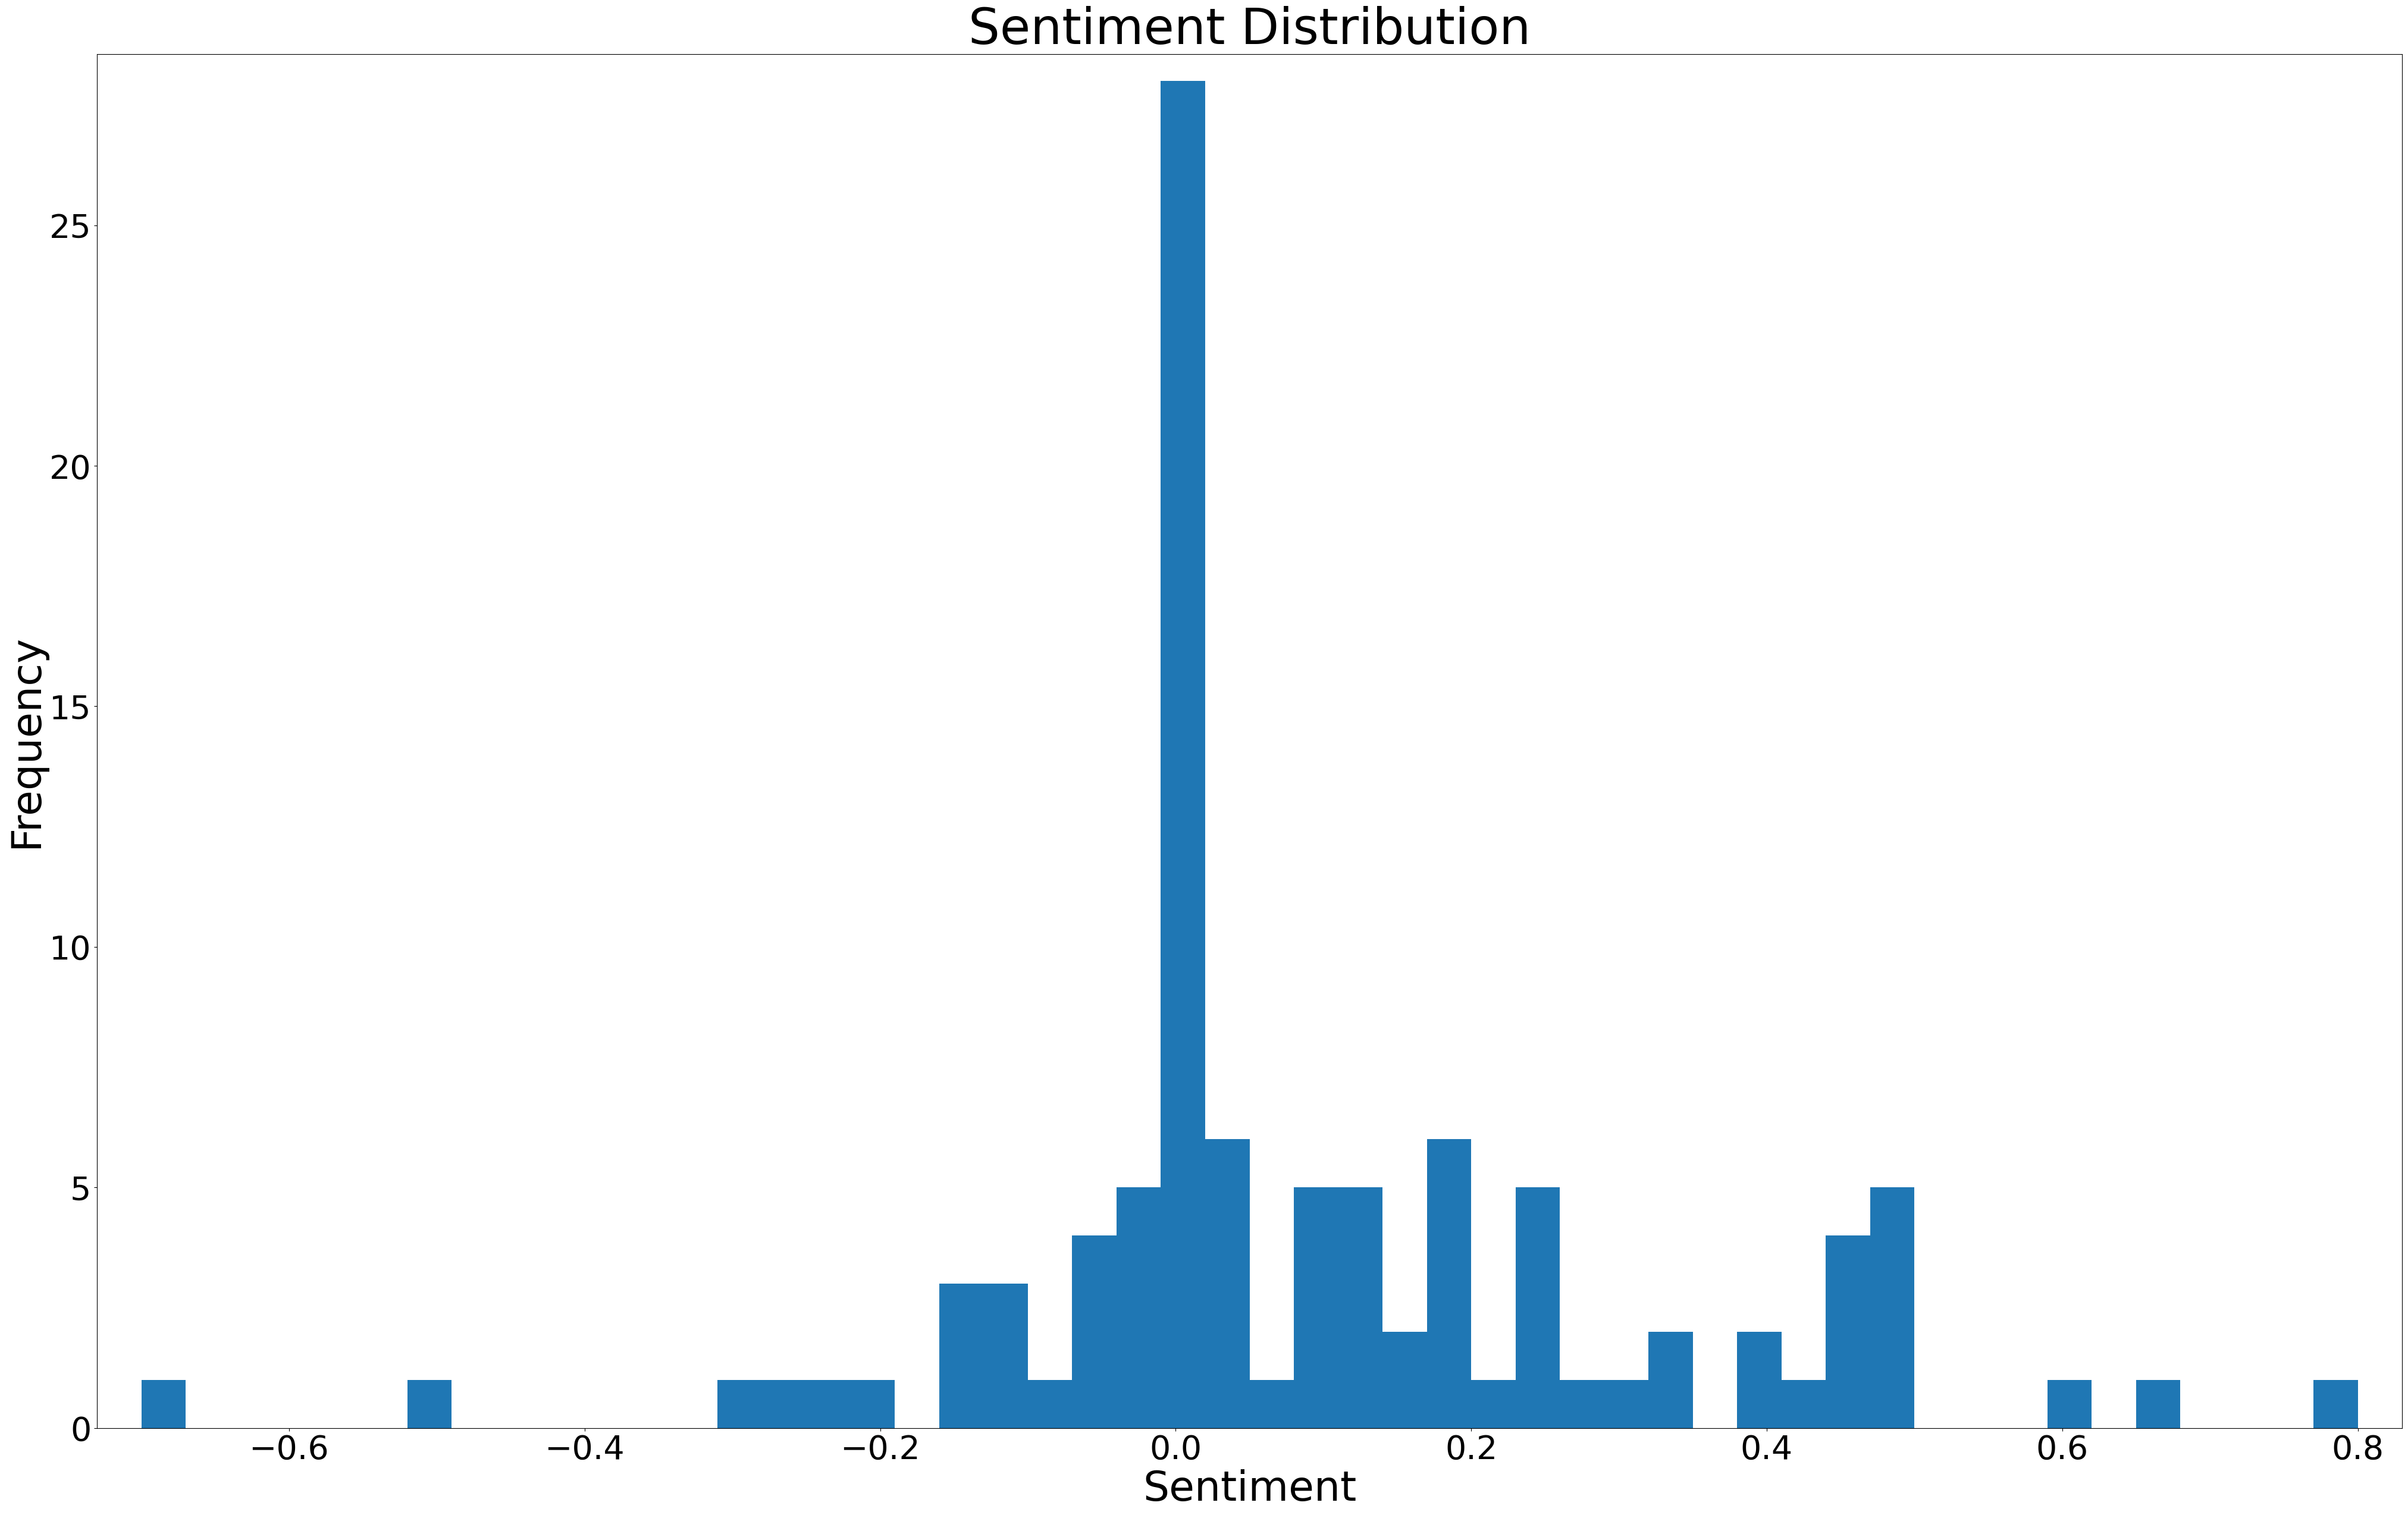

In [22]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

In [23]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df.head()

,Joke Number,lemmatized,lemma_str,sentiment,word_count
0,1,"[man, visit, doctor, doctor, say, bad, news, c...",man visit doctor doctor say bad news cancer al...,-0.700000,16
1,2,"[two, cannibal, eat, clown, one, turn, say, ta...",two cannibal eat clown one turn say taste funny,0.250000,9
2,3,"[q, difference, greet, queen, greet, president...",q difference greet queen greet president unite...,0.000000,13
3,4,"[q, hurricane, tornado, redneck, divorce, comm...",q hurricane tornado redneck divorce common som...,-0.300000,10
4,5,"[guy, stand, tee, shot, seem, eternity, look, ...",guy stand tee shot seem eternity look look mea...,0.316667,44


In [24]:
print(type(df['lemma_str'][0]))

<class 'str'>


In [25]:
# df.drop(['review_len'], axis = 1)
df['joke_len'] = df['lemma_str'].astype(str).apply(len)
df.head()

,Joke Number,lemmatized,lemma_str,sentiment,word_count,joke_len
0,1,"[man, visit, doctor, doctor, say, bad, news, c...",man visit doctor doctor say bad news cancer al...,-0.700000,16,93
1,2,"[two, cannibal, eat, clown, one, turn, say, ta...",two cannibal eat clown one turn say taste funny,0.250000,9,47
2,3,"[q, difference, greet, queen, greet, president...",q difference greet queen greet president unite...,0.000000,13,78
3,4,"[q, hurricane, tornado, redneck, divorce, comm...",q hurricane tornado redneck divorce common som...,-0.300000,10,66
4,5,"[guy, stand, tee, shot, seem, eternity, look, ...",guy stand tee shot seem eternity look look mea...,0.316667,44,268


In [26]:
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist

In [27]:
print(allwords)

['man', 'visit', 'doctor', 'doctor', 'say', 'bad', 'news', 'cancer', 'alzheimer', 'disease', 'man', 'reply', 'well', 'thank', 'god', 'cancer', 'two', 'cannibal', 'eat', 'clown', 'one', 'turn', 'say', 'taste', 'funny', 'q', 'difference', 'greet', 'queen', 'greet', 'president', 'united', 'state', 'get', 'one', 'knee', 'greet', 'queen', 'q', 'hurricane', 'tornado', 'redneck', 'divorce', 'common', 'someone', 'go', 'lose', 'trailer', 'guy', 'stand', 'tee', 'shot', 'seem', 'eternity', 'look', 'look', 'measure', 'distance', 'figure', 'wind', 'direction', 'speed', 'drive', 'partner', 'nut', 'finally', 'exasperate', 'partner', 'say', 'hell', 'take', 'long', 'hit', 'goddamn', 'ball', 'guy', 'answer', 'wife', 'watch', 'clubhouse', 'want', 'make', 'perfect', 'shot', 'well', 'hell', 'man', 'stand', 'snowball', 'chance', 'hell', 'hit', 'ask', 'japanese', 'visitor', 'election', 'country', 'every', 'morning', 'answer', 'father', 'anxious', 'marry', 'daughter', 'want', 'impress', 'date', 'like', 'screw

In [28]:
mostcommon = FreqDist(allwords).most_common(100)

Text(0.5, 1.0, 'Top 100 Most Common Words')

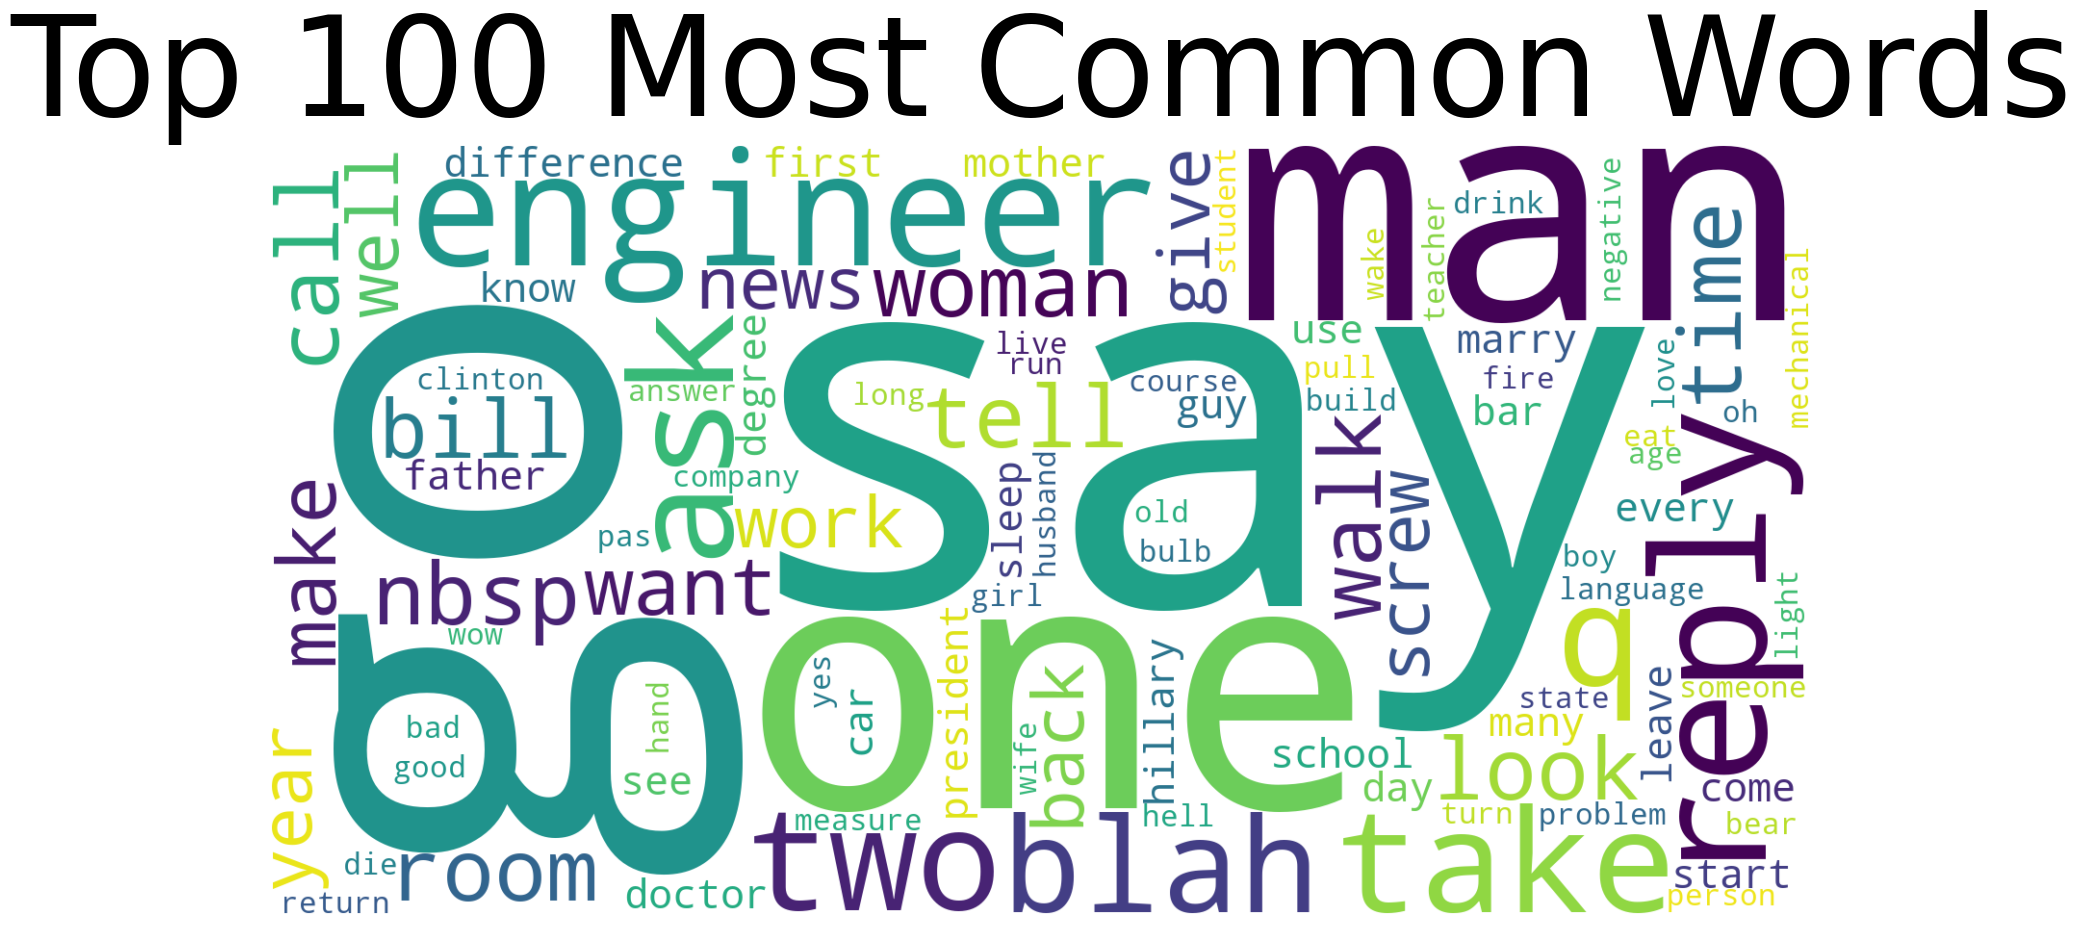

In [29]:
text = ' '.join([word + ' ' * freq for word, freq in mostcommon])
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(text)
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)

In [30]:
plt.tight_layout(pad=0)
plt.show()

<Figure size 640x480 with 0 Axes>

In [31]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)

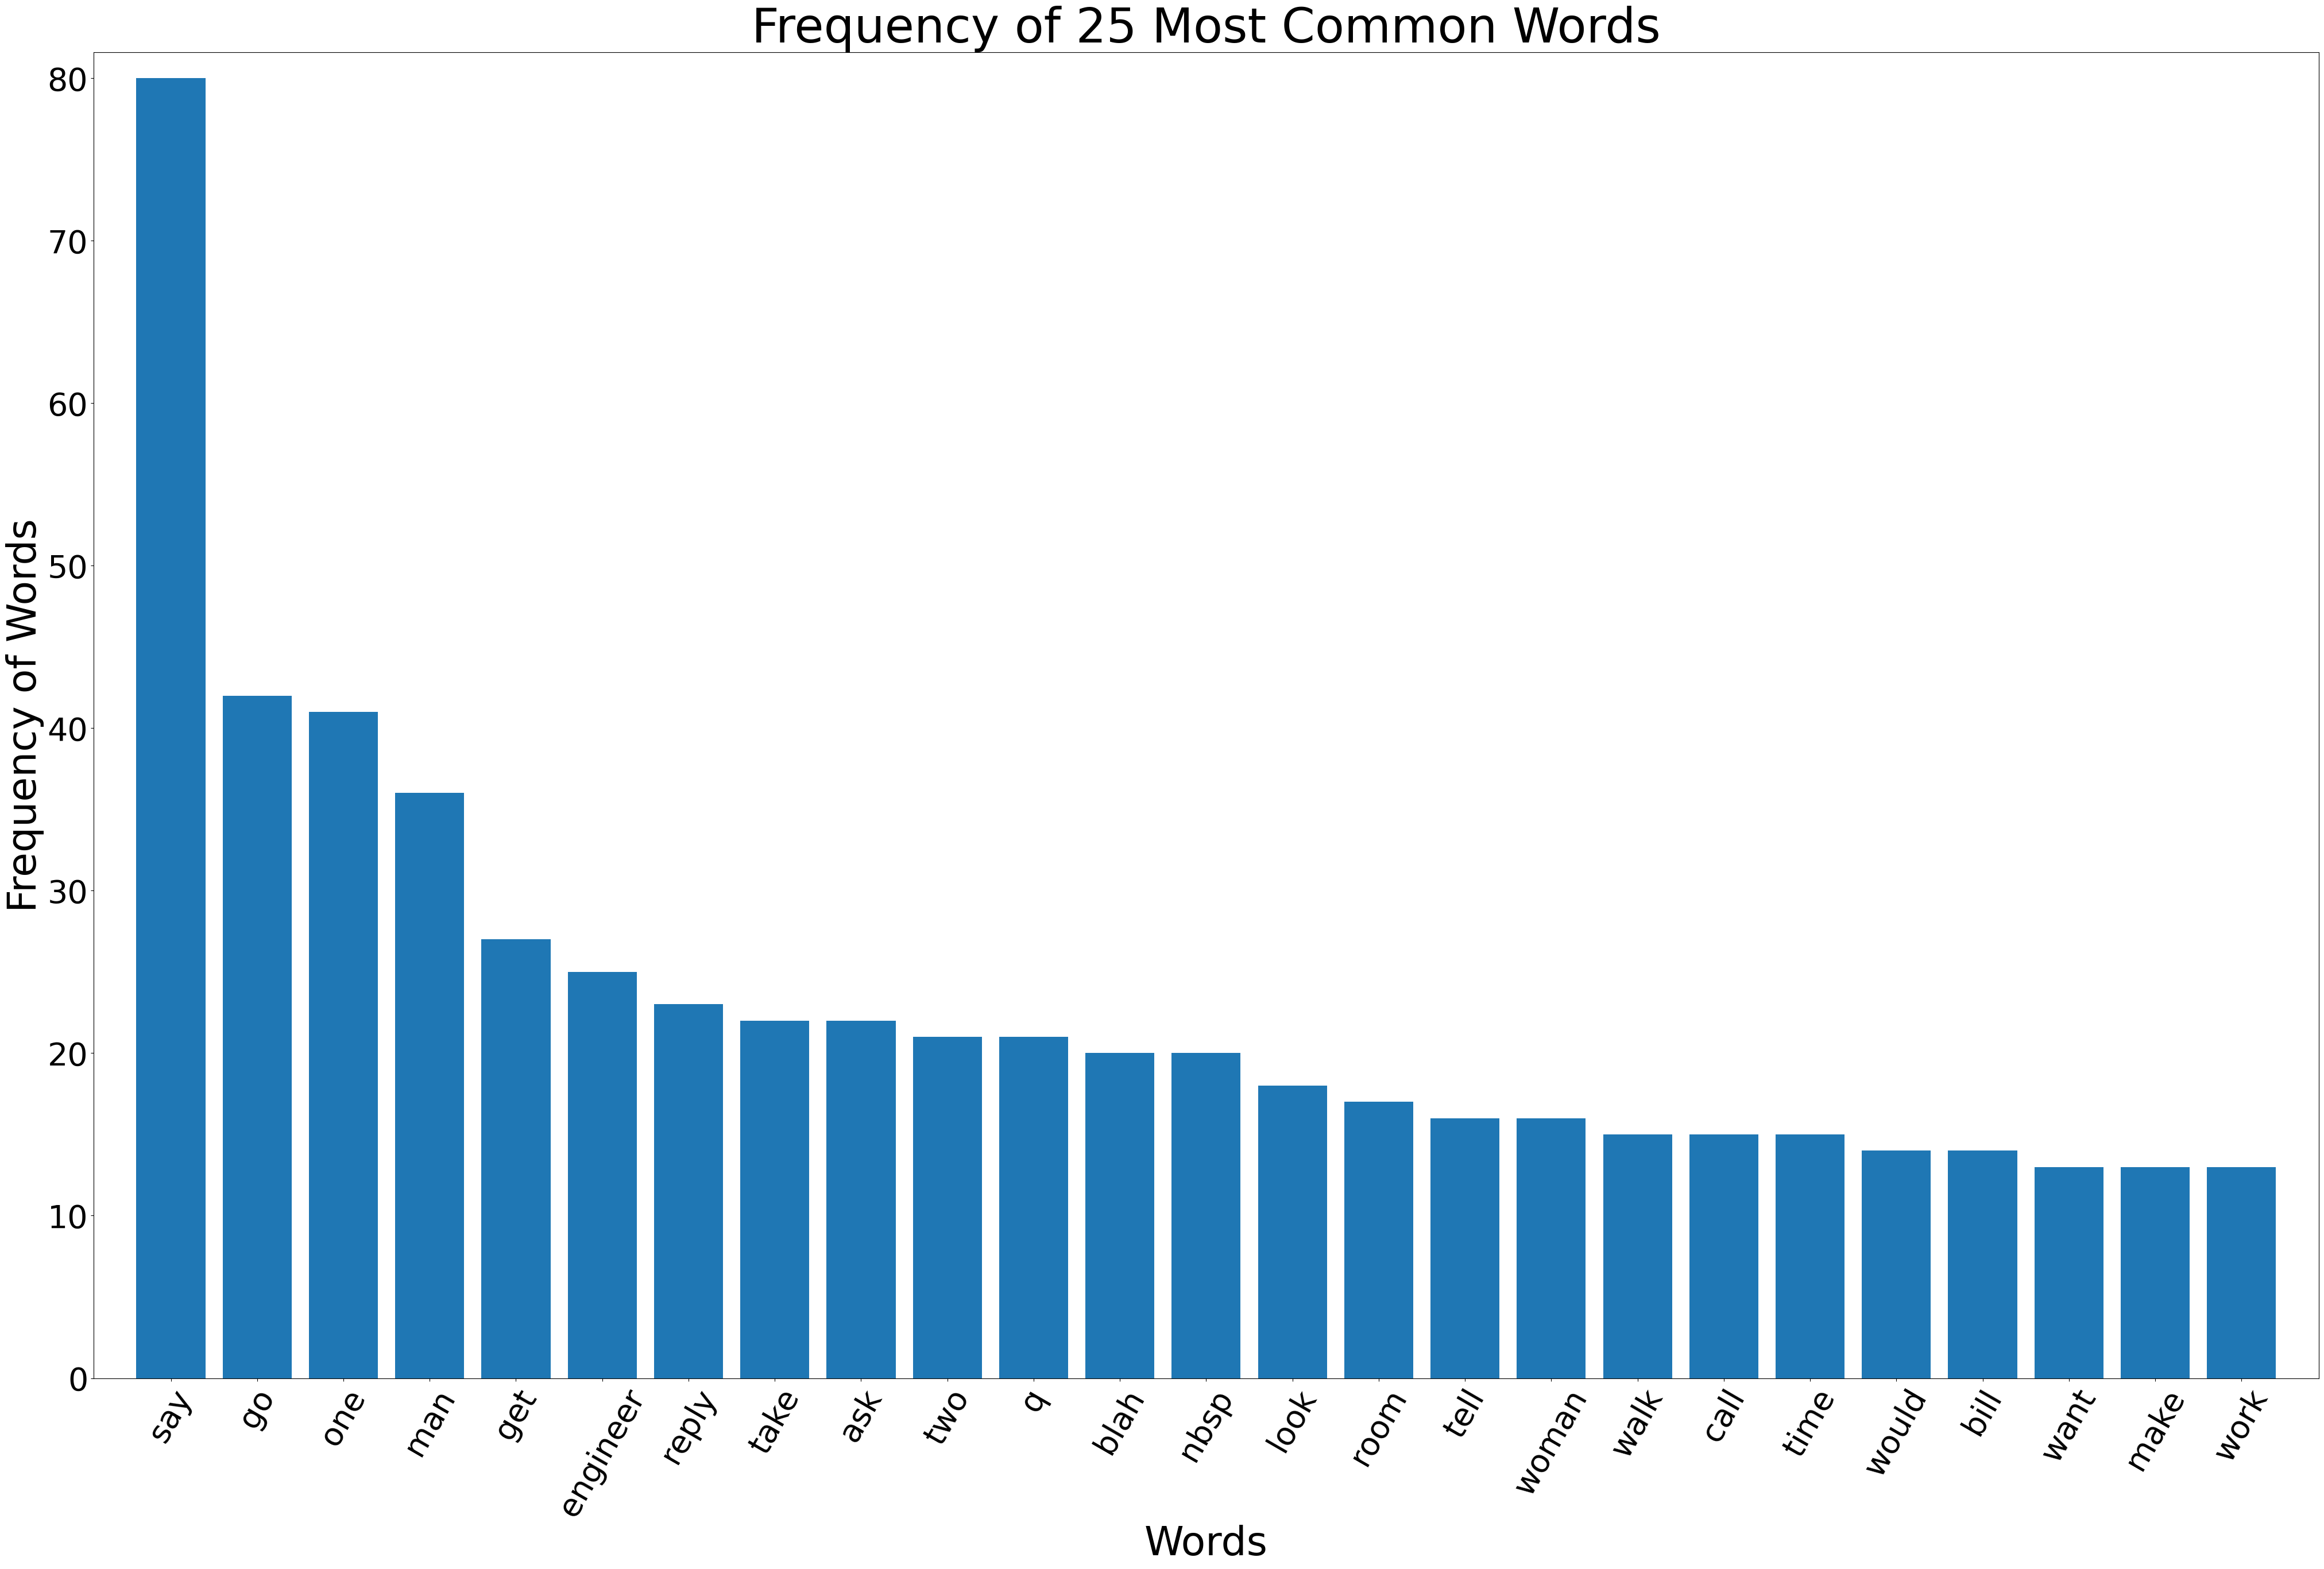

In [32]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [33]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)

In [34]:
tf = tf_vectorizer.fit_transform(df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names_out()

In [35]:
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,go,one,say
0,0,0,1
1,0,1,1
2,0,1,0
3,1,0,0
4,0,0,1
...,...,...,...
95,0,0,0
96,1,0,0
97,0,1,2
98,0,0,0


In [36]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)

In [37]:
no_top_words = 10

In [38]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
say one go
Topic 1:
one say go
Topic 2:
one say go
Topic 3:
one say go
Topic 4:
say one go
Topic 5:
one say go
Topic 6:
say go one
Topic 7:
go one say
Topic 8:
one say go
Topic 9:
one say go


In [45]:
# df.iloc[:,1]
df

,Joke Number,lemmatized,lemma_str,sentiment,word_count,joke_len
0,1,"[man, visit, doctor, doctor, say, bad, news, c...",man visit doctor doctor say bad news cancer al...,-0.700000,16,93
1,2,"[two, cannibal, eat, clown, one, turn, say, ta...",two cannibal eat clown one turn say taste funny,0.250000,9,47
2,3,"[q, difference, greet, queen, greet, president...",q difference greet queen greet president unite...,0.000000,13,78
3,4,"[q, hurricane, tornado, redneck, divorce, comm...",q hurricane tornado redneck divorce common som...,-0.300000,10,66
4,5,"[guy, stand, tee, shot, seem, eternity, look, ...",guy stand tee shot seem eternity look look mea...,0.316667,44,268
...,...,...,...,...,...,...
95,96,"[thought, criticize, someone, walk, mile, shoe...",thought criticize someone walk mile shoe criti...,0.000000,10,65
96,97,"[two, attorney, go, diner, order, two, drink, ...",two attorney go diner order two drink produce ...,0.000000,26,175
97,98,"[teacher, explain, class, different, language,...",teacher explain class different language use n...,-0.064657,39,280
98,99,"[age, womanhood, 1, age, 13, 18, nbsp, nbsp, n...",age womanhood 1 age 13 18 nbsp nbsp nbsp nbsp ...,0.500000,68,364


# Sourav Features

In [168]:
feature_df = pd.read_csv(r'C:\Users\ameyd\Desktop\IIITD\SEM 5\ML\Project\dataset\processed_data.csv')

In [169]:
feature_df = feature_df.drop(columns=['Unnamed: 0'])
feature_df

,Joke Number,Text,UserRating,CleanedTextNLTK,processedTextSpacy
0,1,"A man visits the doctor. The doctor says ""I ha...",0.711360,man visit doctor doctor say bad news cancer al...,man visit doctor doctor say bad news cancer al...
1,2,"Two cannibals are eating a clown, one turns to...",0.540657,two cannibal eating clown one turn say taste f...,cannibal eat clown turn say taste funny
2,3,Q: Whats the difference between greeting a Que...,0.548203,q whats difference greeting queen greeting pre...,q s difference greeting queen greeting preside...
3,4,"Q. What do a hurricane, a tornado, and a redne...",0.195824,q hurricane tornado redneck divorce common som...,q hurricane tornado redneck divorce common som...
4,5,A guy stood over his tee shot for what seemed ...,0.558568,guy stood tee shot seemed eternity looking loo...,guy stand tee shoot eternity look look measure...
...,...,...,...,...,...
95,96,"Just a thought .. Before criticizing someone, ...",0.797869,thought criticizing someone walk mile shoe cri...,think .. criticize walk mile shoe criticize mi...
96,97,Two attorneys went into a diner and ordered tw...,0.815944,two attorney went diner ordered two drink prod...,attorney go diner order drink produce sandwich...
97,98,A teacher is explaining to her class how diffe...,0.704717,teacher explaining class different language us...,teacher explain class different language use n...
98,99,Age and Womanhood 1. Between the ages of 13 an...,0.490954,age womanhood age like africa virgin unexplore...,age womanhood 1 age 13 18 ... like africa virg...


In [177]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import spacy

# Assuming feature_df has a 'TextLength' column representing the length of each text
feature_df['TextLength'] = feature_df['processedTextSpacy'].apply(lambda x: len(x.split()))

# Combine N-grams with Text Length as features
text_data = feature_df['processedTextSpacy']
ngrams = (1, 7)
vectorizer = CountVectorizer(ngram_range=ngrams, stop_words='english')
X_ngrams = vectorizer.fit_transform(text_data)

# Combine N-grams with Text Length
X = pd.concat([pd.DataFrame(X_ngrams.toarray()), feature_df['TextLength']], axis=1)
y = feature_df['UserRating']

folds = 5
kf = KFold(n_splits=folds)

mse_scores = []
mae_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Convert feature names to strings
    X_train.columns = X_train.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)

    # Standardize features
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    model = make_pipeline(SVR(kernel='rbf'))
    model.fit(X_train_std, y_train)

    y_pred = model.predict(X_test_std)

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

average_mse = sum(mse_scores) / folds
average_mae = sum(mae_scores) / folds

print(f"Average Mean Squared Error across {folds} folds: {average_mse:.2f}")
print(f"Average Mean Absolute Error across {folds} folds: {average_mae:.2f}")

Average Mean Squared Error across 5 folds: 8.90
Average Mean Absolute Error across 5 folds: 2.32


In [198]:
for i in range(100):
    print(f"OG        \n{feature_df.iloc[i,1]}")
    print(f"YASSIFIED \n{feature_df.iloc[i,4]}")

OG        
A man visits the doctor. The doctor says "I have bad news for you.You have cancer and Alzheimer's disease". The man replies "Well,thank God I don't have cancer!"
YASSIFIED 
man visit doctor doctor say bad news cancer alzheimer disease man reply wellthank god cancer
OG        
Two cannibals are eating a clown, one turns to other and says: "Does this taste funny to you?
YASSIFIED 
cannibal eat clown turn say taste funny
OG        
Q: Whats the difference between greeting a Queen and greeting the President of the United States? A: You only have to get on one knee to greet the queen.
YASSIFIED 
q s difference greeting queen greeting president united states knee greet queen
OG        
Q. What do a hurricane, a tornado, and a redneck divorce all have in common? A. Someone's going to lose their trailer...
YASSIFIED 
q hurricane tornado redneck divorce common someone go lose trailer ..
OG        
A guy stood over his tee shot for what seemed an eternity, looking up, looking down, me